In [1]:
%matplotlib widget

import matplotlib
import math
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import HTML

In [2]:
def generate_sine_and_time(num_periods=2, num_points=-1, f=1, amp=1, phi=0):
    """
    
    """
    w = 2*np.pi*f
    if num_points == -1:
        num_points = int(np.ceil(w*2))
    x = np.linspace(0,(1/f)*num_periods, num_points)
    y = amp*np.sin(w * (x-phi))
    return x,y

# Introduction
In DSP we often need to examine very large values and very small values at the same time.
Using decibels allows us to do that due to it being a logarithmic scale.

Decibels are a ratio, and are therefore technically unitless

In [3]:
X = np.asarray([1,3,10,20,30,25,40,100,1000])
X = np.arange(0,1000)
REFERENCE = 1

/tmp/ipykernel_9931/3435280560.py:4: RuntimeWarning: divide by zero encountered in log10
  y_decibels = 10*np.log10(X/REFERENCE)


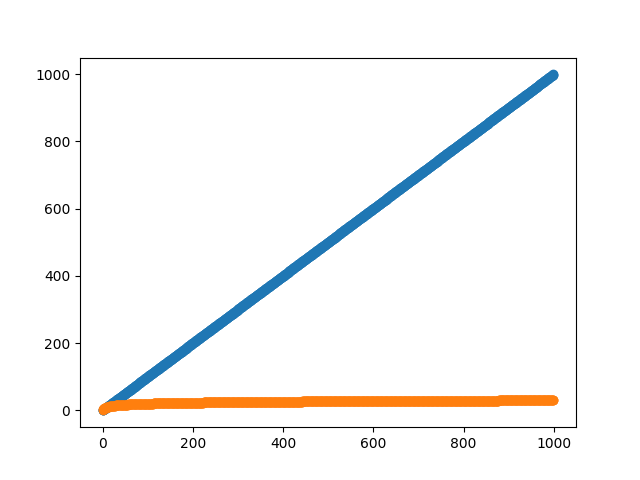

In [4]:
fig, ax_0 = plt.subplots()

y_ratio = X/REFERENCE
y_decibels = 10*np.log10(X/REFERENCE)

ax_0.scatter(X, y_ratio)
ax_0.scatter(X, y_decibels);

# Decibels allow us to clearly see small and large values at the same time
We generate some noise, along with 3 blips. Notice how in the first chart (which is plotting raw values), how hard it is to distinguish the noise from the blips.
In the second chart we plot blips in decibels against the average value of the noise. 

/tmp/ipykernel_9931/759376341.py:21: RuntimeWarning: invalid value encountered in log10
  signal = 10*np.log10(signal/signal_avg)


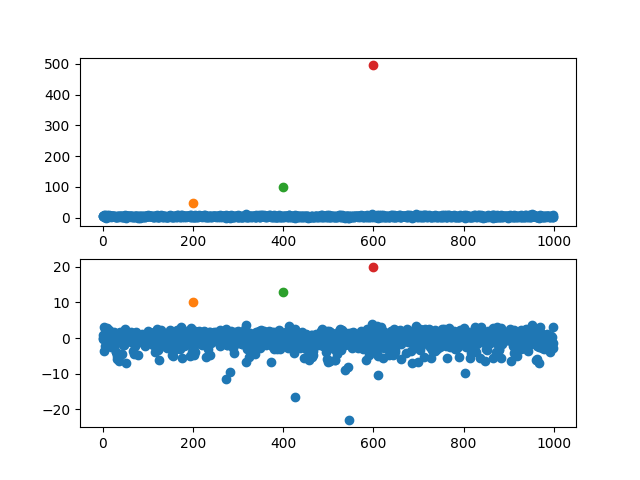

In [5]:
# Plotting raw values
fig, (ax_1,ax_2) = plt.subplots(2)

signal = np.random.default_rng(1337).normal(loc=5, scale=2, size=1000)
signal_avg = np.mean(signal)

blip_10 = (200, signal_avg*10)
blip_20 = (400, signal_avg*20)
blip_100 = (600, signal_avg*100)

ax_1.scatter(range(len(signal)), signal)

ax_1.scatter(blip_10[0], blip_10[1])
ax_1.scatter(blip_20[0], blip_20[1])
ax_1.scatter(blip_100[0], blip_100[1])

# Plotting decibel values, with noise average as the base
signal = np.random.default_rng(1337).normal(loc=5, scale=2, size=1000)
signal_avg = np.mean(signal)

signal = 10*np.log10(signal/signal_avg)

blip_10 = (200, 10*np.log10(signal_avg*10/signal_avg))
blip_20 = (400, 10*np.log10(signal_avg*20/signal_avg))
blip_100 = (600, 10*np.log10(signal_avg*100/signal_avg))

ax_2.scatter(range(len(signal)), signal)

ax_2.scatter(blip_10[0], blip_10[1])
ax_2.scatter(blip_20[0], blip_20[1])
ax_2.scatter(blip_100[0], blip_100[1]);

# Quick Decibel Hacks
## 10 dB is 10 times greater. 20 dB is 100 times greater.
## dB/10 is the number of 0's in the ratio.
10dB->1-> 10 times greater  
20dB->2->100 times greater  
30dB->3->1000 times greater  
Double the power: +3 dB  
Halve the power: -3 dB  
Ten times the power: +10 dB  
One tenth the power: -10 dB  
100 times the power: +20 dB  
1/100 the power : -20 dB  

# Power of a signal
The power of a signal is the sum of the absolute squares of its time-domain samples divided by the signal length, or, equivalently, the square of its RMS level.

$$ x_\text{RMS} = \sqrt{\frac{1}{n}(x_1^2 + x_2^2 + x_3^2 + \cdots)}$$

Power: 0.4995000000000006


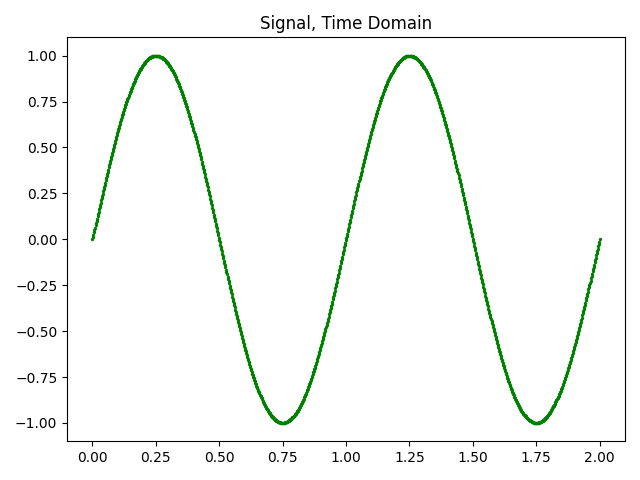

In [6]:
fig, (ax_signal_0) = plt.subplots(1)


ax_signal_0.set_title("Signal, Time Domain")
N = 1000 # number of samples to simulate, choose any number you want

t,sig = generate_sine_and_time(num_points=N)

ax_signal_0.scatter(t,sig, s=2, color="g")

fig.tight_layout()

power = sum([a*a for a in sig]) / len(sig)
print("Power:",power)

# Noise
We assume that noise has a normal distribution, with a mean of 0. The variance of that random variable will affect the average noise power.

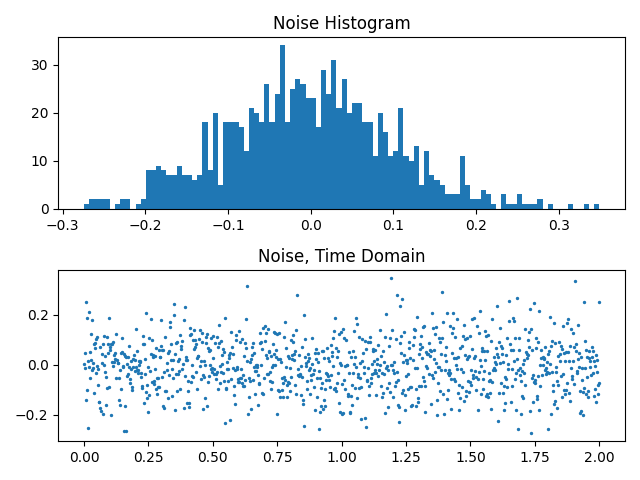

In [7]:
fig, (ax_hist_0, ax_noise_0) = plt.subplots(2)

ax_hist_0.set_title("Noise Histogram")
ax_noise_0.set_title("Noise, Time Domain")

N = 1000 # number of samples to simulate, choose any number you want

noise = np.random.default_rng(1337).normal(loc=0, scale=0.1, size=N)



ax_hist_0.hist(noise, bins=100)
ax_noise_0.scatter(t, noise, s=2)

fig.tight_layout()

## Power of noise
Power of noise is also equal to its variance

In [8]:
N = 10000000 # number of samples to simulate, choose any number you want
stddev = 0.1
variance = stddev**2

t,sig = generate_sine_and_time(num_points=N)
noise = np.random.default_rng(1337).normal(loc=0, scale=stddev, size=N)

power = sum([a*a for a in noise]) / len(noise)

# Pretty close!
print(power)
print(variance)

0.009999527297481044
0.010000000000000002


## SNR

interactive(children=(FloatSlider(value=1.0, description='noise_stddev', max=4.0), Output()), _dom_classes=('w…

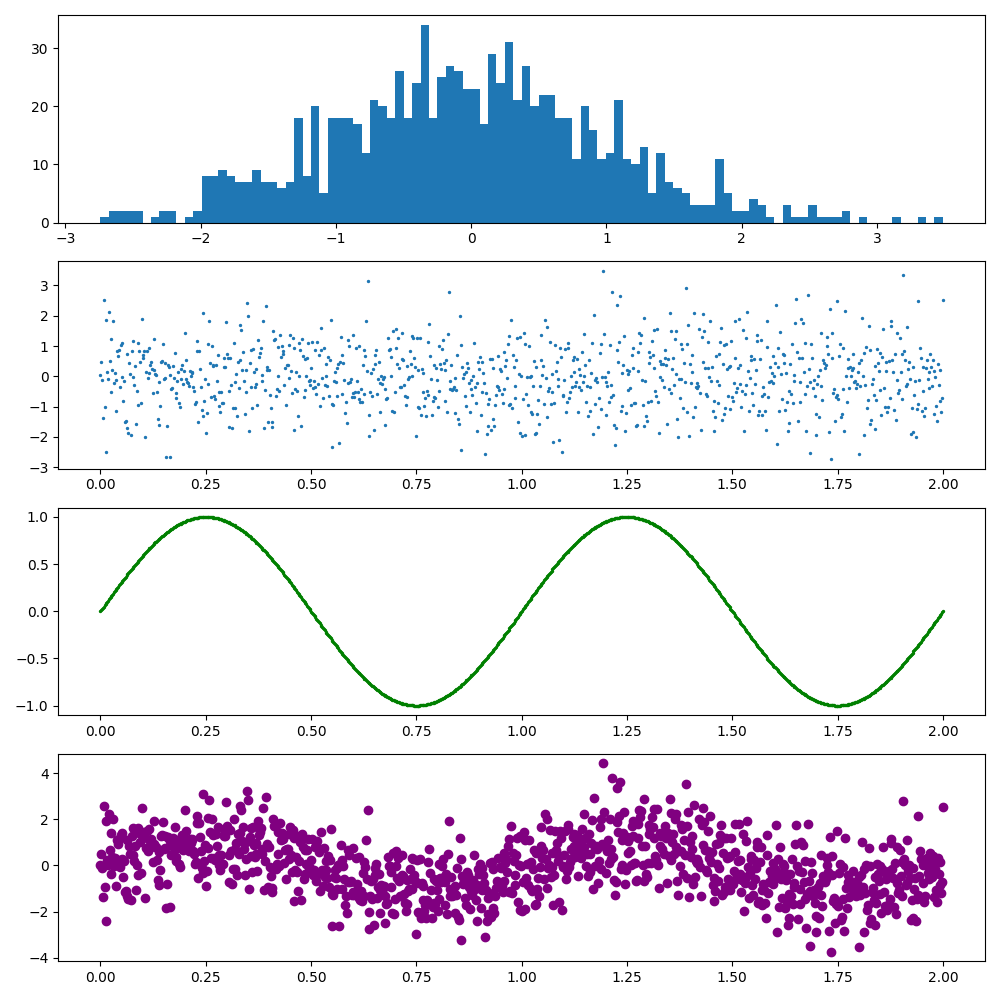

In [9]:
fig, (ax_hist_1, ax_noise_1, ax_signal_1, ax_combined_1) = plt.subplots(4, figsize=(10,10))

ax_hist_1.set_title("Noise Histogram")
ax_noise_1.set_title("Noise, Time Domain")
ax_signal_1.set_title("Signal, Time Domain")
ax_signal_1.set_title("Signal+Noise, Time Domain")

N = 1000 # number of samples to simulate, choose any number you want

t,sig = generate_sine_and_time(num_points=N)
power_signal = sum([a*a for a in np.abs(sig)]) / len(sig)

rng = np.random.default_rng(1337)

@widgets.interact(noise_stddev=(0, 4, .1))
def noise(noise_stddev=1.0):
    """Remove old lines from plot and plot new one"""
    ax_hist_1.clear()
    ax_noise_1.clear()
    ax_signal_1.clear()
    ax_combined_1.clear()
    
    
    noise = rng.normal(loc=0, scale=noise_stddev, size=N)
    power_noise = sum([a*a for a in noise]) / len(noise)

    
    ax_hist_1.hist(noise, bins=100)
    ax_noise_1.scatter(t, noise, s=2)
    ax_signal_1.scatter(t,sig, s=2, color="g")
    ax_combined_1.scatter(t, sig+noise, color="purple")

    snr = power_signal/power_noise
    snr_dB = 10*np.log10(snr)
    
    print("Power Signal:", power_signal)
    print("Power Noise:", power_noise)
    print("SNR:", snr)
    print("SNR_dB:", snr_dB)

fig.tight_layout()